In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline

In [3]:
#read in combined DOG csv from DOG algorithm
df = pd.read_csv("/Users/patrickgonzales/desktop/Linklab/Heatshock/combined_DOG.csv", sep="\t")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 28 columns):
gene_id_name                487 non-null object
gene_biotype_name           487 non-null object
TYPE                        487 non-null object
chr                         487 non-null object
strand                      487 non-null object
DOG_length                  487 non-null int64
DOG_start_local             487 non-null int64
DOG_end_local               487 non-null int64
DOG_start_meta              487 non-null int64
DOG_end_meta                487 non-null int64
DOG_from_downstream_gene    487 non-null object
DOG_from_upstream_gene      487 non-null object
DOG_into_downstream_gene    487 non-null object
POG_into_upstream_gene      487 non-null object
padj                        439 non-null float64
baseMean                    487 non-null float64
pvalue                      487 non-null float64
log2FoldChange              487 non-null float64
lfcSE                       487 

In [5]:
# make dataframe subsets based on adjusted p values and fold change
# to test if the distribution of the length of DOGs are significantly different.
df_sigdiff = df[df['padj']<=0.05]
df_sigdiff_upHS = df_sigdiff[df_sigdiff['log2FoldChange']>0]
df_sigdiff_control = df_sigdiff[df_sigdiff['log2FoldChange']<0]
df_NOT_sigdiff = df[df['padj']>0.05]

#take a look at descriptive stats
print("Sigdiff up in HS: DOG-length stats\n",df_sigdiff_upHS['DOG_length'].describe())
print("\nSigdiff up in Control: DOG-length stats\n",df_sigdiff_control['DOG_length'].describe())
print("\nNot significantly different: DOG-length stats:\n",df_NOT_sigdiff['DOG_length'].describe())

Sigdiff up in HS: DOG-length stats
 count       97.000000
mean      1227.835052
std       2213.299868
min        200.000000
25%        300.000000
50%        400.000000
75%        900.000000
max      10800.000000
Name: DOG_length, dtype: float64

Sigdiff up in Control: DOG-length stats
 count       29.000000
mean      1727.586207
std       3199.095469
min        200.000000
25%        200.000000
50%        300.000000
75%        900.000000
max      12100.000000
Name: DOG_length, dtype: float64

Not significantly different: DOG-length stats:
 count      313.000000
mean      1279.872204
std       2687.914068
min        200.000000
25%        200.000000
50%        400.000000
75%        800.000000
max      23100.000000
Name: DOG_length, dtype: float64


#### All three groups have a mean that is ~3 fold greater than the value at the 50th perentile- indicating right-skewed data. Need to visualize the data with a histrogram.

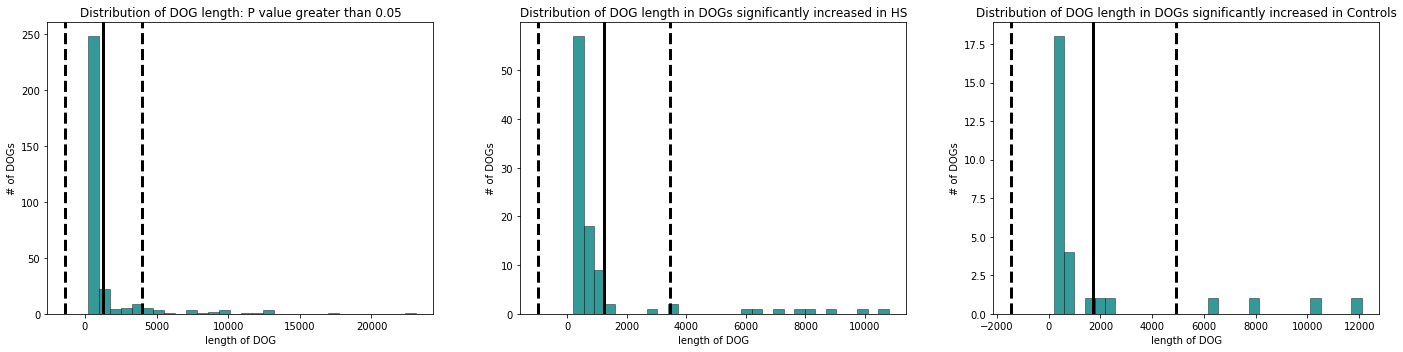

In [9]:
#plot histograms with mean(solid) and standard deviation (dashed) lines for three dataframes.
#is distribution normal?
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.hist(df_NOT_sigdiff['DOG_length'], bins=30, edgecolor='black',linewidth=0.5, color='teal', alpha=0.8)
plt.axvline(df_NOT_sigdiff['DOG_length'].mean(), color="black",linestyle='solid', linewidth=3)
plt.axvline(df_NOT_sigdiff['DOG_length'].mean() + df_NOT_sigdiff['DOG_length'].std(), color="black", linestyle="dashed", linewidth=3)
plt.axvline(df_NOT_sigdiff['DOG_length'].mean() - df_NOT_sigdiff['DOG_length'].std(),color="black", linestyle='dashed', linewidth=3)
plt.ylabel('# of DOGs')
plt.xlabel('length of DOG')
plt.title('Distribution of DOG length: P value greater than 0.05')

plt.subplot(1, 3, 2)
plt.hist(df_sigdiff_upHS['DOG_length'], bins=30, edgecolor='black',linewidth=0.5, color='teal', alpha=0.8)
plt.axvline(df_sigdiff_upHS['DOG_length'].mean(), color='black', linestyle='solid', linewidth=3)
plt.axvline(df_sigdiff_upHS['DOG_length'].mean() + df_sigdiff_upHS['DOG_length'].std(), color='black', linestyle='dashed', linewidth=3)
plt.axvline(df_sigdiff_upHS['DOG_length'].mean() - df_sigdiff_upHS['DOG_length'].std(), color='black', linestyle='dashed', linewidth=3)
plt.ylabel('# of DOGs')
plt.xlabel('length of DOG')
plt.title('Distribution of DOG length in DOGs significantly increased in HS')

plt.subplot(1, 3, 3)
plt.hist(df_sigdiff_control['DOG_length'], bins=30, edgecolor='black',linewidth=0.5, color='teal', alpha=0.8)
plt.axvline(df_sigdiff_control['DOG_length'].mean(), color='black', linestyle='solid', linewidth=3)
plt.axvline(df_sigdiff_control['DOG_length'].mean() + df_sigdiff_control['DOG_length'].std(), color='black', linestyle='dashed', linewidth=3)
plt.axvline(df_sigdiff_control['DOG_length'].mean() - df_sigdiff_control['DOG_length'].std(), color='black', linestyle='dashed', linewidth=3)
plt.ylabel('# of DOGs')
plt.xlabel('length of DOG')
plt.title('Distribution of DOG length in DOGs significantly increased in Controls')
plt.tight_layout()
plt.show()

In [10]:
# distribution is not normal- use non-parametric test. 
#Use Wilcoxon-rank sum test to test if the two groups are drawn from same distribution
# similar to T-test but for non-parametric data.
print("Not sigdiff vs Up in Control:\n",stats.ranksums(df_NOT_sigdiff['DOG_length'], df_sigdiff_control['DOG_length']))
print("\nNot sigdiff vs Up in HS:\n",stats.ranksums(df_NOT_sigdiff['DOG_length'], df_sigdiff_upHS['DOG_length']))
print("\nUp in Control vs Up in HS:\n",stats.ranksums(df_sigdiff_control['DOG_length'], df_sigdiff_upHS['DOG_length']))

Not sigdiff vs Up in Control:
 RanksumsResult(statistic=-0.01963235485269349, pvalue=0.9843366533628995)

Not sigdiff vs Up in HS:
 RanksumsResult(statistic=-1.2797413060803515, pvalue=0.20063613229478106)

Up in Control vs Up in HS:
 RanksumsResult(statistic=-0.6896851226943121, pvalue=0.4903922236437549)


#### None of the three comparisons have a P value < 0.05. Therefore we accept the  null hypoothesis that the distributions are the same. 